In [17]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import requests
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.68M/6.68M [00:01<00:00, 5.32MB/s]


In [3]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
 # HTML object
html = browser.html
# Parse HTML with Beautiful Soup
soup = BeautifulSoup(html, 'html.parser')
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<meta content="Mark Otto, Jacob Thornton, and Bootstrap contributors" name="author"/>
<meta content="Hugo 0.84.0" name="generator"/>
<title>Mars Temperature Data</title>
<link href="https://getbootstrap.com/docs/5.0/examples/jumbotron/" rel="canonical"/>
<!-- Bootstrap core CSS -->
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" rel="stylesheet"/>
<style>
    .bd-placeholder-img {
      font-size: 1.125rem;
      text-anchor: middle;
      -webkit-user-select: none;
      -moz-user-select: none;
      user-select: none;
    }

    @media (min-width: 768px) {
      .bd-placeholder-img-lg {
        font-size: 3.5rem;
      }
    }
  </style>
</head>
<body>
<main>
<div class="container py-4">


In [5]:
# Retrieve all elements that contain book information
temp_table = soup.find_all('tbody')
temp_table

[<tbody><tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

In [6]:
#Scrape webdata to dataframe

all_rows = soup.find_all('tr', class_ = 'data-row')

temp_list = []
for row in all_rows:
    td = row.find_all('td')
    row = [col.text for col in td]
    temp_list.append(row)
    
temp_df = pd.DataFrame(temp_list, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])
temp_df   

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [7]:
#Checking datatypes of dataframe
dataframe_Type = temp_df.dtypes
dataframe_Type

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [8]:
#Convert datatype
convert_dict = {'id': int,
                'sol': int,
                'ls': int,
                'month': int,
                'min_temp': float,
                'pressure': float
                }
 
temp_df = temp_df.astype(convert_dict)
temp_df["terrestrial_date"] = pd.to_datetime(temp_df["terrestrial_date"])
print(temp_df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [9]:
temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [10]:
#number of months in Mars
no_months = temp_df['month'].nunique()
no_months

12

In [11]:
#How many Martian (and not Earth) days' worth of data exist in the scraped dataset?
no_martian_days = temp_df['sol'].nunique()
no_martian_days

1867

In [50]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
temp_df_groupby_month = temp_df.groupby('month').mean()
temp_df_avg_mintemp = temp_df_groupby_month['min_temp'].reset_index('month')
temp_df_avg_mintemp

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


Text(0.5, 1.0, 'Temperature over months')

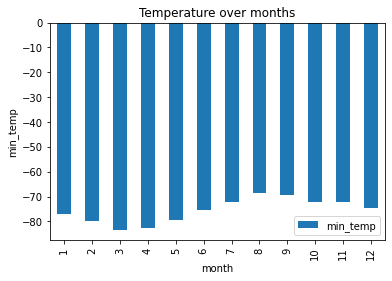

In [31]:
#Plotting the results for the variation of temperature over the martian months
temp_df_avg_mintemp.plot(x='month',y='min_temp', kind = 'bar')
plt.ylabel('min_temp')
plt.title('Temperature over months')

In [51]:
#Coldest  months
min_temp_mars = temp_df_avg_mintemp['min_temp'].min()
coldest_month = temp_df_avg_mintemp.loc[temp_df_avg_mintemp['min_temp'] == min_temp_mars, 'month'].iloc[0]
coldest_month

3

In [52]:
#warmest month
max_temp_mars = temp_df_avg_mintemp['min_temp'].max()
warmest_month = temp_df_avg_mintemp.loc[temp_df_avg_mintemp['min_temp'] == max_temp_mars, 'month'].iloc[0]
warmest_month

8

In [55]:
#Which months have the lowest and the highest atmospheric pressure on Mars? 
#Get the answer by averaging the daily atmospheric pressure of all the months. 
#Plot the results as a bar chart.
pressure_groupby_month = temp_df.groupby('month').mean()
pressure_avg_month = pressure_groupby_month['pressure'].reset_index('month')
pressure_avg_month

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


Text(0.5, 1.0, 'Temperature over months')

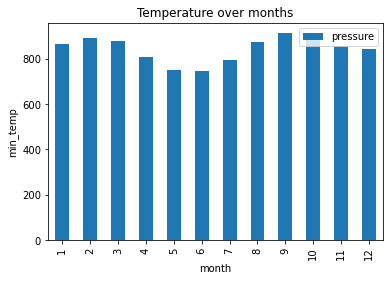

In [56]:
pressure_avg_month.plot(x='month',y='pressure', kind = 'bar')
plt.ylabel('min_temp')
plt.title('Temperature over months')

In [57]:
#lowest pressure
min_press_mars = pressure_avg_month['pressure'].min()
min_press_month = pressure_avg_month.loc[pressure_avg_month['pressure'] == min_press_mars, 'month'].iloc[0]
min_press_month

6

In [58]:
#highest pressure
max_press_mars = pressure_avg_month['pressure'].max()
max_press_month = pressure_avg_month.loc[pressure_avg_month['pressure'] == max_press_mars, 'month'].iloc[0]
max_press_month

9

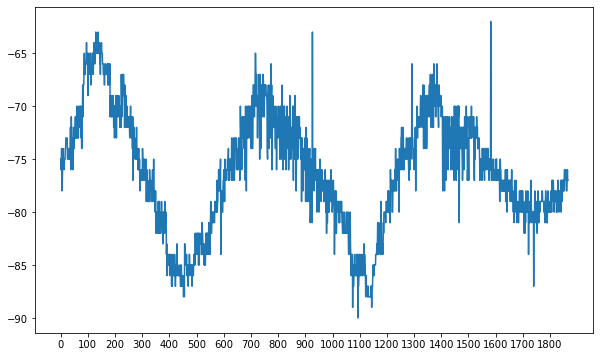

In [84]:
#About how many terrestrial (Earth) days exist in a Martian year? 
#That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
#Visually estimate the result by plotting the daily minimum temperature.
plt.figure(figsize=(10,6))
temp_df['min_temp'].plot(x='month',y='min_temp')
plt.xticks(np.arange(0, len(temp_df), 100))
#plt.figure(figsize=(100,60))
plt.show()

In [ ]:
# From the plotted graph, approximately the number of martian days is 600.

In [74]:
# dataframe to csv
temp_df.to_csv('Mission to mars.csv', encoding='utf-8')